In [3]:
from scipy.stats import kstest
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
sns.set_theme(style="whitegrid")
from Class import taux_remplissage
from sklearn import decomposition
from functions_pca import *
from sklearn import preprocessing

Populating the interactive namespace from numpy and matplotlib


In [4]:
tickets = pd.read_csv("../../lab/origin_values/faux_billets.csv", parse_dates=True) 
tickets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [11]:
tickets['genuine_int'] = tickets['is_genuine'] * 1
tickets['genuine_int'].astype(int)
tickets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,genuine_int
0,True,171.81,104.86,104.95,4.52,2.89,112.83,1
1,True,171.67,103.74,103.70,4.01,2.87,113.29,1
2,True,171.83,103.76,103.76,4.40,2.88,113.84,1
3,True,171.80,103.78,103.65,3.73,3.12,113.63,1
4,True,172.05,103.70,103.75,5.04,2.27,113.55,1


In [13]:
data = tickets.copy()
data.drop('is_genuine', axis='columns')

,diagonal,height_left,height_right,margin_low,margin_up,length,genuine_int
0,171.81,104.86,104.95,4.52,2.89,112.83,1
1,171.67,103.74,103.70,4.01,2.87,113.29,1
2,171.83,103.76,103.76,4.40,2.88,113.84,1
3,171.80,103.78,103.65,3.73,3.12,113.63,1
4,172.05,103.70,103.75,5.04,2.27,113.55,1
...,...,...,...,...,...,...,...
165,172.11,104.23,104.45,5.24,3.58,111.78,0
166,173.01,104.59,104.31,5.04,3.05,110.91,0
167,172.47,104.27,104.10,4.88,3.33,110.68,0
168,171.82,103.97,103.88,4.73,3.55,111.87,0


In [41]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data.drop(['genuine_int','is_genuine'], axis='columns'),data['genuine_int'], train_size=0.8)
display(xtrain,ytrain)

,diagonal,height_left,height_right,margin_low,margin_up,length
70,171.04,103.84,103.64,4.22,3.36,112.70
53,172.32,104.16,104.14,3.78,3.25,113.38
38,172.21,104.27,104.01,4.23,2.79,113.78
106,172.22,104.17,104.07,4.52,3.67,112.13
155,172.10,103.98,104.28,5.78,3.16,111.09
...,...,...,...,...,...,...
64,171.99,103.97,103.89,4.22,3.17,113.12
67,171.79,103.74,103.48,4.60,2.80,113.35
118,171.83,104.39,104.17,5.51,3.33,113.64
81,171.95,103.84,103.68,3.79,3.09,112.68


70     1
53     1
38     1
106    0
155    0
      ..
64     1
67     1
118    0
81     1
121    0
Name: genuine_int, Length: 136, dtype: int64

In [42]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [86]:
xtest.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
19,171.75,104.16,104.00,4.19,3.03,113.55
104,171.75,104.16,104.23,5.75,3.25,111.68
42,171.88,103.66,103.52,4.66,2.75,113.25
149,171.91,103.91,103.98,4.78,3.65,111.41
136,171.69,103.87,104.16,5.46,3.31,111.42


In [44]:
# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)
predicted

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0])

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, predicted)   

0.9705882352941176

In [49]:
error_pourcent = 1- accuracy_score(ytest, predicted) 
error_pourcent * 100

2.941176470588236

In [58]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score

for i in range(20):
    iteration = i+1
    knn = neighbors.KNeighborsClassifier(n_neighbors=iteration)
    knn.fit(xtrain, ytrain)
    predicted = knn.predict(xtest)
    score_pourcent = accuracy_score(ytest, predicted) 
    print('nb iter: ',iteration,' score: ',round(score_pourcent *100, 2))
    predicted
    
    

nb iter:  1  score:  97.06
nb iter:  2  score:  97.06
nb iter:  3  score:  97.06
nb iter:  4  score:  97.06
nb iter:  5  score:  97.06
nb iter:  6  score:  97.06
nb iter:  7  score:  97.06
nb iter:  8  score:  97.06
nb iter:  9  score:  97.06
nb iter:  10  score:  97.06
nb iter:  11  score:  94.12
nb iter:  12  score:  94.12
nb iter:  13  score:  94.12
nb iter:  14  score:  94.12
nb iter:  15  score:  94.12
nb iter:  16  score:  94.12
nb iter:  17  score:  94.12
nb iter:  18  score:  94.12
nb iter:  19  score:  94.12
nb iter:  20  score:  97.06


In [59]:
predicted

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0])

In [87]:
xtest.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
19,171.75,104.16,104.00,4.19,3.03,113.55
104,171.75,104.16,104.23,5.75,3.25,111.68
42,171.88,103.66,103.52,4.66,2.75,113.25
149,171.91,103.91,103.98,4.78,3.65,111.41
136,171.69,103.87,104.16,5.46,3.31,111.42


In [73]:
xtest.shape

ytrain.shape[0] 

136

In [74]:
xtest.shape[0] 

34

In [88]:
ytest.head()

19     1
104    0
42     1
149    0
136    0
Name: genuine_int, dtype: int64

In [75]:
ytest.shape[0] 

34

In [76]:
predicted.shape[0] 

34

In [81]:
result = pd.DataFrame(ytest)
result['prediction'] = predicted
result

,genuine_int,prediction
19,1,1
104,0,0
42,1,1
149,0,0
136,0,0
139,0,0
88,1,1
54,1,1
49,1,1
100,0,0


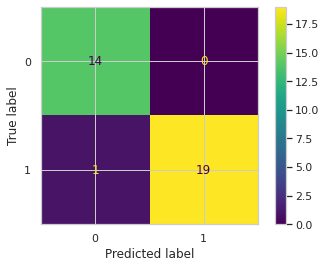

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, predicted, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot() 

In [85]:
cm

array([[14,  0],
       [ 1, 19]])